In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [11]:
data_set=pd.read_csv("Social_media_effect.csv")

In [12]:
data_set

,What is your age?,Which social media platform/s do you like the most or use the most?,Number of social medial do you use ?,How much time do you spend on social media in a day?,How much time do you spend on physical activities in a day?,How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?,Have you ever been a victim of any of these cyber crimes?,Which type of communication do you generally prefer?,Measurement Effect in human
0,19,"Whatsapp, Facebook, Instagram",3.0,upto 4 hrs,less than 1 hr,3,Fake profiles,through phone,High
1,19,"Whatsapp, Facebook, Youtube, Instagram",4.0,more than 4 hrs,less than 1 hr,5,Photos being misused,Text message,High
2,19,"Whatsapp, Facebook, Instagram",3.0,upto 4 hrs,less than 1 hr,5,Hacking,through phone,High
3,19,"Whatsapp, Facebook, Youtube, Twitter",4.0,1 - 2.5 hrs,less than 1 hr,2,None of the above,face to face,Low
4,18,"Youtube, Instagram",2.0,upto 4 hrs,1 - 2.5 hrs,3,None of the above,Text message,High
...,...,...,...,...,...,...,...,...,...
286,19,"Whatsapp, Facebook, Youtube, Instagram, Hike",5.0,1 - 2.5 hrs,none,5,None of the above,"face to face, through social media",Low
287,18,Instagram,1.0,upto 4 hrs,1 - 2.5 hrs,10,None of the above,"through phone, through social media",High
288,18,Whatsapp,1.0,1 - 2.5 hrs,1 - 2.5 hrs,4,Hacking,through social media,Low
289,19,"Whatsapp, Youtube, Twitter",3.0,more than 4 hrs,less than 1 hr,3,None of the above,through social media,High


In [13]:

data_set = data_set.drop(
    "Which social media platform/s do you like the most or use the most?", axis=1)
print(data_set.isna().sum())


What is your age?                                                                                     0
Number of social medial do you use ?                                                                  1
How much time do you spend on social media in a day?                                                  0
How much time do you spend on physical activities in a day?                                           0
How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?    0
Have you ever been a victim of any of these cyber crimes?                                             0
Which type of communication do you generally prefer?                                                  0
Measurement Effect in human                                                                           0
dtype: int64


In [14]:
# Encode Categorical Columns
categ = ['How much time do you spend on social media in a day?', 'How much time do you spend on physical activities in a day?',
         'Have you ever been a victim of any of these cyber crimes?', 'Which type of communication do you generally prefer?', 'Measurement Effect in human']
le = LabelEncoder()
data_set[categ] = data_set[categ].apply(le.fit_transform)

In [15]:
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values

In [17]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
Imputer = imp.fit(x[:, 1:2])
x[:, 1:2] = imp.fit_transform(x[:, 1:2])


In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=0)


In [19]:
print("\n\n\n\n")
print("\t\t\t\t\t\t\t Random Forest")

classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))







							 Random Forest
Confusion Matrix: 
 [[31  3]
 [ 2 23]]
Accuracy:  0.9152542372881356
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.88      0.92      0.90        25

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



AUC Score:  0.98


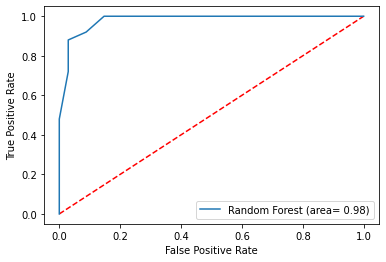

In [20]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
AUCLR = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues = metrics.roc_curve(y_test, y_pred_proba)
mtp.plot([0, 1], [0, 1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="Random Forest (area= " + str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()


In [21]:
print("\n\n\n\n")
print("\t\t\t\t\t\t\t Adaboost")

classifier = AdaBoostClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))







							 Adaboost
Confusion Matrix: 
 [[33  1]
 [ 1 24]]
Accuracy:  0.9661016949152542
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.96      0.96      0.96        25

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



AUC Score:  0.9894117647058823


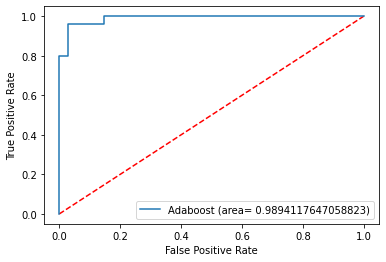

In [22]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
AUCLR = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues = metrics.roc_curve(y_test, y_pred_proba)
mtp.plot([0, 1], [0, 1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="Adaboost (area= " + str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()


In [23]:
print("\n\n\n\n")
print("\t\t\t\t\t\t\t Gradient Boosting")

classifier = GradientBoostingClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))







							 Gradient Boosting
Confusion Matrix: 
 [[31  3]
 [ 1 24]]
Accuracy:  0.9322033898305084
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.89      0.96      0.92        25

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59



AUC Score:  0.9847058823529412


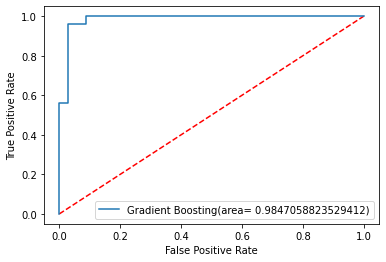

In [24]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
AUCLR = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues = metrics.roc_curve(y_test, y_pred_proba)
mtp.plot([0, 1], [0, 1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="Gradient Boosting(area= " + str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()


In [25]:
print("\n\n\n\n")
print("\t\t\t\t\t\t\t MLP")

classifier = MLPClassifier(random_state=1, max_iter=300)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))







							 MLP
Confusion Matrix: 
 [[31  3]
 [ 2 23]]
Accuracy:  0.9152542372881356
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.88      0.92      0.90        25

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC Score:  0.9494117647058824


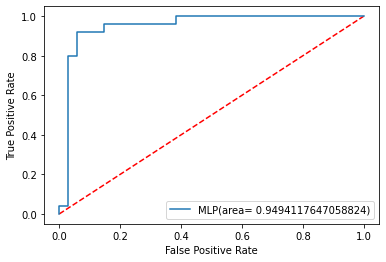

In [26]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
AUCLR = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues = metrics.roc_curve(y_test, y_pred_proba)
mtp.plot([0, 1], [0, 1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="MLP(area= " + str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()
